In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station=Base.classes.station
measurement=Base.classes.measurement

station,name,latitude,longitude,elevation

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
for row in session.query(station.name, station.latitude).limit(5).all():
    print(row)

('WAIKIKI 717.2, HI US', 21.2716)
('KANEOHE 838.1, HI US', 21.4234)
('KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213)
('PEARL CITY, HI US', 21.3934)
('UPPER WAHIAWA 874.3, HI US', 21.4992)


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


<Axes: xlabel='date'>

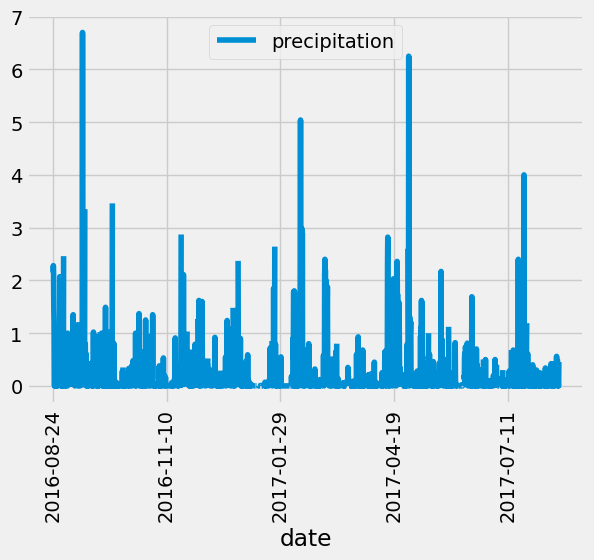

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.  
last_date_obj = datetime.strptime(recent_date[0], "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
previous_year=last_date_obj-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data_pre=session.query(measurement.date,measurement.prcp).\
    filter(measurement.date >= previous_year).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_pre_df = pd.DataFrame(data_pre,columns=['date','precipitation'])

# Sort the dataframe by date
df = data_pre_df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation', rot=90)


In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_pre_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number of stations in the dataset
total_station = session.query(station).group_by(station.station).count()
print(total_station)

9


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
total_pre = session.query(measurement.station,func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).all()
total_pre

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
highest_pre = session.query(measurement.station,func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).first()
highest_pre

('USC00519281', 2772)

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_min_avg = session.query(func.min(measurement.tobs),func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(max_min_avg)

[(54.0, 85.0, 71.66378066378067)]


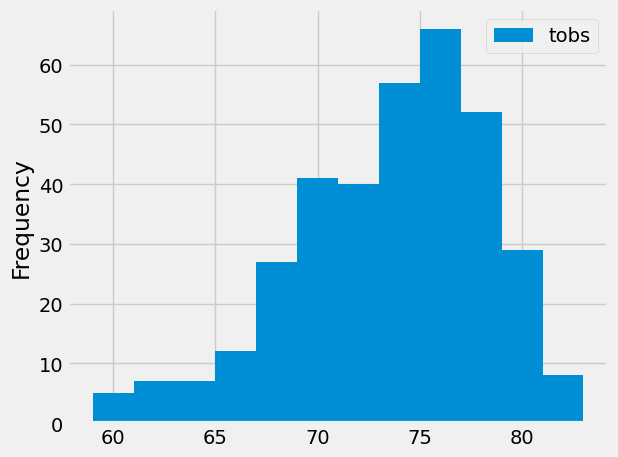

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Calculate the date one year from the last date in data set.
previous_year=last_date_obj-dt.timedelta(days=365)
data_pre=session.query(measurement.tobs).\
    filter(measurement.date >= previous_year).filter(measurement.station == 'USC00519281').all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(data_pre, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

# Close Session

In [24]:
# Close Session
session.close()